In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sql
import pymysql
import sklearn.linear_model as skllm
import statsmodels.api as sm
import bin_time_data as bd
%matplotlib inline

In [91]:
sns.set_context('poster')

In [92]:
#connect to db
engine = sql.create_engine('mysql+pymysql://root:@localhost/zidisha')

In [8]:
'''
#load tables

#data on individual borrowers
df_borrowers = pd.read_sql_query('SELECT * FROM borrowers', engine)
#data on each loan started
df_loans = pd.read_sql_query('SELECT * FROM loans', engine)
#data on credits given for inviting new borrowers
df_credits = pd.read_sql_query('SELECT * FROM credits_earned_new', engine)
#country data (more than just the contries covered by Zidisha)
df_countries = pd.read_sql_query('SELECT * FROM countries', engine)
#exhange rates over time
df_exchange = pd.read_sql_query('SELECT * FROM exchange_rates', engine)
'''

"\n#load tables\n\n#data on individual borrowers\ndf_borrowers = pd.read_sql_query('SELECT * FROM borrowers', engine)\n#data on each loan started\ndf_loans = pd.read_sql_query('SELECT * FROM loans', engine)\n#data on credits given for inviting new borrowers\ndf_credits = pd.read_sql_query('SELECT * FROM credits_earned_new', engine)\n#country data (more than just the contries covered by Zidisha)\ndf_countries = pd.read_sql_query('SELECT * FROM countries', engine)\n#exhange rates over time\ndf_exchange = pd.read_sql_query('SELECT * FROM exchange_rates', engine)\n"

In [93]:
#new accepted borrower account creation dates
df_new_borrowers = pd.read_sql_query('SELECT created_at FROM borrowers WHERE activation_status != 4 ORDER BY created_at', engine)
df_new_borrowers = pd.DataFrame({'number': range(len(df_new_borrowers))}, index=df_new_borrowers.created_at.values)

#all borrower account creation dates
df_borrowers = pd.read_sql_query('SELECT created_at FROM borrowers', engine)
df_borrowers = pd.DataFrame({'number': 1}, index=df_borrowers.created_at.values)

#all loans
df_loans = pd.read_sql_query('SELECT created_at FROM loans', engine)
df_loans = pd.DataFrame({'number': 1}, index=df_loans.created_at.values)

#all loans fully funded
df_loans_funded = pd.read_sql_query('SELECT created_at FROM loans WHERE raised_percentage = 100', engine)
df_loans_funded = pd.DataFrame({'number': 1}, index=df_loans_funded.created_at.values)

#time to funding
df_time_to_fund = pd.read_sql_query('SELECT applied_at, TIMESTAMPDIFF(SECOND, applied_at, accepted_at) AS time_to FROM loans WHERE disbursed_at IS NOT NULL ORDER BY applied_at', engine)
df_time_to_fund = pd.DataFrame({'time_to': df_time_to_fund.time_to.values/(24.*3600.)}, index=df_time_to_fund.applied_at.values)

#time to disbursement
df_time_to_disperse = pd.read_sql_query('SELECT accepted_at, TIMESTAMPDIFF(SECOND, accepted_at, disbursed_at) AS time_to FROM loans WHERE disbursed_at IS NOT NULL ORDER BY accepted_at', engine)
df_time_to_disperse = pd.DataFrame({'time_to': df_time_to_disperse.time_to.values/(24.*3600.)}, index=df_time_to_disperse.accepted_at.values)


In [95]:
#time_bins_edge = pd.date_range('2014-04-01','2015-09-01', None, '2W')
time_bins_edge = pd.date_range('2012-02-01','2015-09-01', None, '2W')
#time_bins_edge = pd.date_range('2013-04-01','2015-09-01', None, '3W')
time_bins_center = bd.bin_centers_from_edges_time(time_bins_edge)

#maximum number of invitees
df_max_invite = pd.DataFrame({'max_invites': 0}, index=time_bins_center)
df_max_invite[('2014-04-01'<=df_max_invite.index) & (df_max_invite.index<'2014-06-01')] = 4
#df_max_invite[('2014-04-01'<=df_max_invite.index) & (df_max_invite.index<'2014-06-01')] = 25
df_max_invite[('2014-06-01'<=df_max_invite.index) & (df_max_invite.index<'2014-10-01')] = 3
df_max_invite[('2014-10-01'<=df_max_invite.index) & (df_max_invite.index<'2014-12-01')] = 4
df_max_invite[('2014-12-01'<=df_max_invite.index) & (df_max_invite.index<'2015-02-01')] = 4
#df_max_invite[('2014-12-01'<=df_max_invite.index) & (df_max_invite.index<'2015-02-01')] = 8
df_max_invite[('2015-02-01'<=df_max_invite.index) & (df_max_invite.index<'2015-03-01')] = 4
df_max_invite[('2015-03-01'<=df_max_invite.index) & (df_max_invite.index<'2015-08-01')] = 10
df_max_invite[('2015-08-01'<=df_max_invite.index) & (df_max_invite.index<'2015-09-01')] = 4

#maximum new loan
df_max_new_loan = pd.DataFrame({'max_loan': 1}, index=time_bins_center)
df_max_new_loan[('2012-02-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2012-08-01')] = 1000
df_max_new_loan[('2012-08-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2013-04-01')] = 500
df_max_new_loan[('2013-04-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2013-12-01')] = 100
df_max_new_loan[('2013-12-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2014-01-01')] = 100
#df_max_new_loan[('2013-12-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2014-01-01')] = 250
df_max_new_loan[('2014-01-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2014-02-01')] = 150
#df_max_new_loan[('2014-01-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2014-02-01')] = 450
df_max_new_loan[('2014-02-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2014-11-01')] = 150
df_max_new_loan[('2014-11-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2015-08-01')] = 100
df_max_new_loan[('2015-08-01'<=df_max_new_loan.index) & (df_max_new_loan.index<'2015-10-01')] = 150

#fee level
df_fee_level = pd.DataFrame({'fee_level': 1}, index=time_bins_center)

df_avg_total_borrowers = bd.bin_mean_time(time_bins_edge, df_new_borrowers)
df_new_borrowers_counts = bd.bin_count_time(time_bins_edge, df_new_borrowers)
df_borrowers_counts = bd.bin_count_time(time_bins_edge, df_borrowers)
df_new_app_accept_rate = df_new_borrowers_counts / df_borrowers_counts
df_avg_total_borrowers.rename(columns={'data_mean': 'avg_total_borrowers'}, inplace=True)
df_new_borrowers_counts.rename(columns={'data_counts': 'new_borrowers_per_period'}, inplace=True)
df_new_app_accept_rate.rename(columns={'data_counts': 'new_app_accept_frac'}, inplace=True)

df_avg_time_to_fund = bd.bin_mean_time(time_bins_edge, df_time_to_fund)
df_avg_time_to_fund.rename(columns={'data_mean': 'avg_time_to_fund'}, inplace=True)
#df_avg_time_to_disperse = bd.bin_mean_time(time_bins_edge, df_time_to_disperse)
#df_avg_time_to_disperse.rename(columns={'data_mean': 'avg_time_to_disperse'}, inplace=True)
df_avg_time_to_disperse = bd.bin_median_time(time_bins_edge, df_time_to_disperse)
df_avg_time_to_disperse.rename(columns={'data_median': 'avg_time_to_disperse'}, inplace=True)

df_loans_count = bd.bin_count_time(time_bins_edge, df_loans)
df_loans_funded_count = bd.bin_count_time(time_bins_edge, df_loans_funded)
df_loans_fund_rate = df_loans_funded_count / df_loans_count
df_loans_fund_rate.rename(columns={'data_counts': 'loan_fund_rate'}, inplace=True)


In [96]:
df_median_time_to_disperse = bd.bin_median_time(time_bins_edge, df_time_to_disperse)

In [97]:
df_median_time_to_fund = bd.bin_median_time(time_bins_edge, df_time_to_fund)

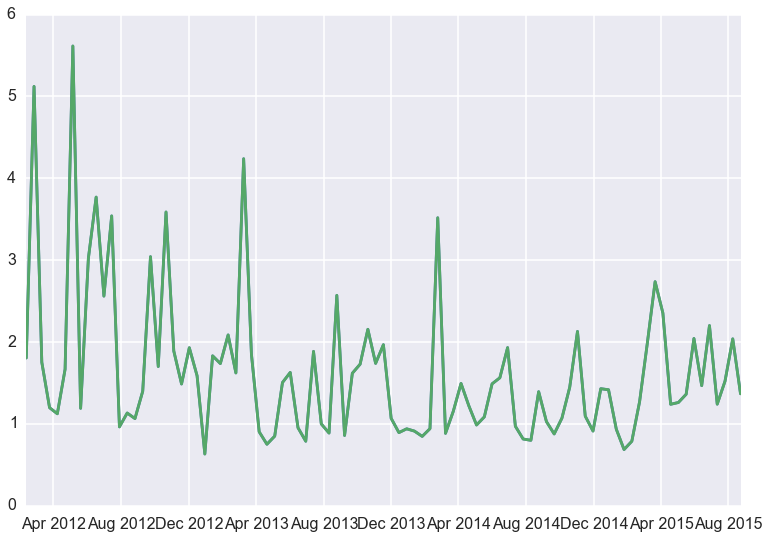

In [98]:
plt.plot(df_avg_time_to_disperse.index, df_avg_time_to_disperse.avg_time_to_disperse)
plt.plot(df_median_time_to_disperse.index, df_median_time_to_disperse.data_median)


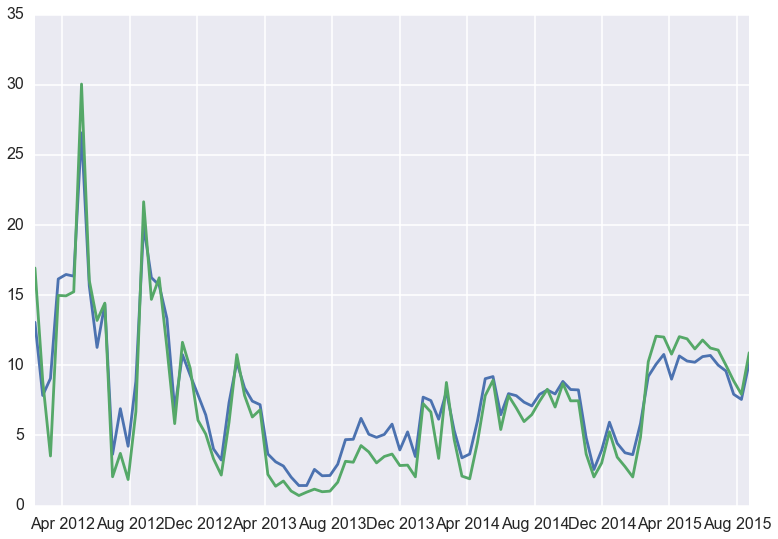

In [99]:
plt.plot(df_avg_time_to_fund.index, df_avg_time_to_fund.avg_time_to_fund)
plt.plot(df_median_time_to_fund.index, df_median_time_to_fund.data_median)


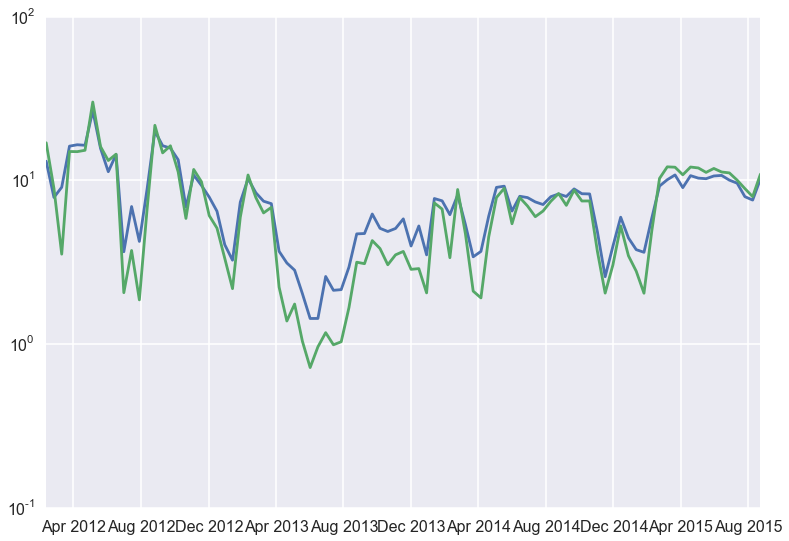

In [100]:
plt.plot(df_avg_time_to_fund.index, df_avg_time_to_fund.avg_time_to_fund)
plt.plot(df_median_time_to_fund.index, df_median_time_to_fund.data_median)
plt.yscale('log')

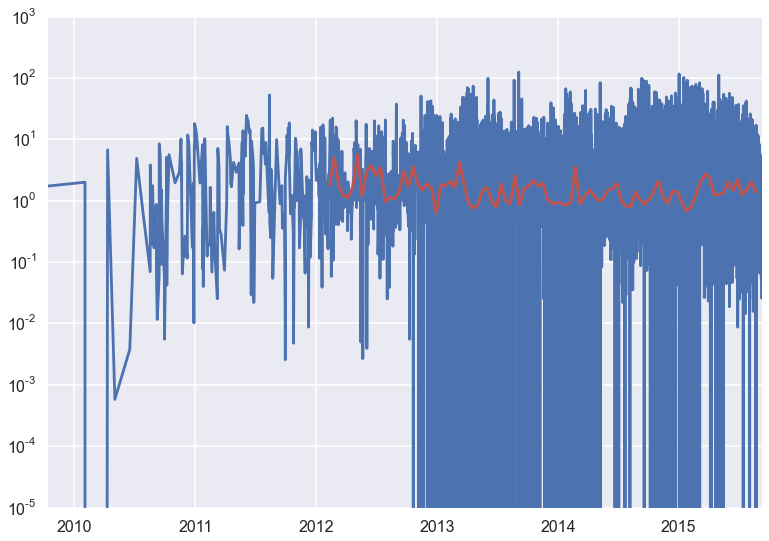

In [101]:
plt.plot(df_time_to_disperse.index, df_time_to_disperse.time_to)
plt.plot(df_avg_time_to_disperse.index, df_avg_time_to_disperse.avg_time_to_disperse)
plt.plot(df_median_time_to_disperse.index, df_median_time_to_disperse.data_median)
plt.yscale('log')

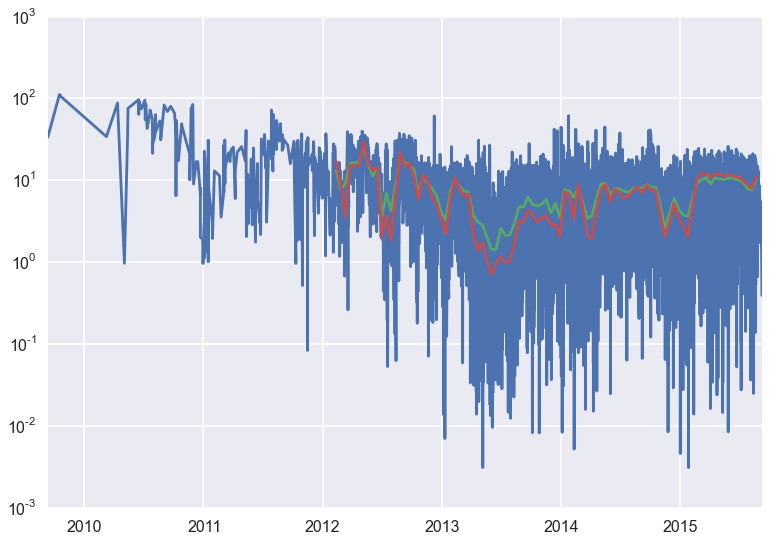

In [102]:
plt.plot(df_time_to_fund.index, df_time_to_fund.time_to)
plt.plot(df_avg_time_to_fund.index, df_avg_time_to_fund.avg_time_to_fund)
plt.plot(df_median_time_to_fund.index, df_median_time_to_fund.data_median)
plt.yscale('log')

In [103]:

#Fit matrix, n_samples x n_features
disperse_feature = df_avg_time_to_disperse.avg_time_to_disperse.values
fund_time_feature = df_avg_time_to_fund.avg_time_to_fund.values
invite_feature = df_avg_total_borrowers.avg_total_borrowers * df_max_invite.max_invites.values
fund_rate_feature = df_loans_fund_rate.loan_fund_rate.values
app_accept_feature = df_new_app_accept_rate.new_app_accept_frac.values
max_loan_feature = df_max_new_loan.max_loan.values

label_array = df_new_borrowers_counts.new_borrowers_per_period.values
feature_mat = np.transpose(np.array([disperse_feature, fund_time_feature, invite_feature, fund_rate_feature, app_accept_feature, max_loan_feature]))

In [104]:
linear_regress_model = skllm.LinearRegression()
linear_regress_model.fit(feature_mat, label_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

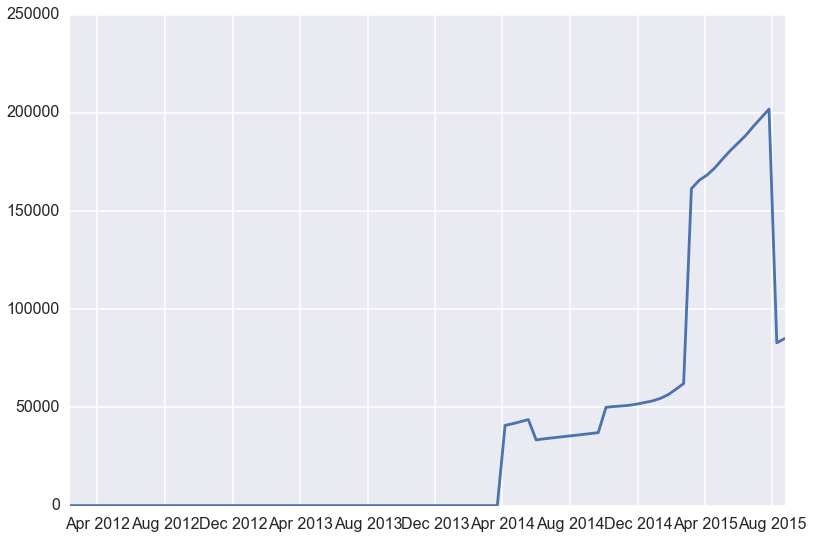

In [105]:
plt.plot(time_bins_center, invite_feature)

In [106]:
fit_array = linear_regress_model.predict(feature_mat)
resid = label_array - fit_array
linear_regress_model.score(feature_mat, label_array)


0.50743836553209676

In [107]:
const_array = np.empty(len(time_bins_center))
const_array.fill(1)
feature_mat2 = np.transpose(np.array([const_array, disperse_feature, fund_time_feature, invite_feature, fund_rate_feature, app_accept_feature, max_loan_feature]))
model = sm.OLS(label_array, feature_mat2)
results = model.fit()
print(results.summary())
labels = ['x1: Time to dispersal','x2: Time to fund','x3: Max invites * total borrowers','x4: Fraction funded','x5: Fraction applicants accepted','x6: Maximum loan limit']
print('\n'.join(labels)+'\n')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     14.77
Date:                Mon, 21 Sep 2015   Prob (F-statistic):           1.59e-11
Time:                        19:07:28   Log-Likelihood:                -573.85
No. Observations:                  93   AIC:                             1162.
Df Residuals:                      86   BIC:                             1179.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -48.9734    142.047     -0.345      0.7

In [108]:
results.predict()

array([  91.15898243,  -42.96741275,    4.84174536,  -29.06435571,
         51.21217666,   11.95672741,   32.44299058,   -6.25209282,
        -44.97726291,   30.08221481,   38.3889443 ,   62.93028816,
         12.79270378,  171.58659696,  154.31534998,  149.32119498,
        171.98086321,  138.03243023,  115.84924293,   92.61219327,
        125.68792018,  145.39009283,  181.54860089,  179.6576897 ,
        187.67000436,  178.41202172,  161.91561672,  182.02681811,
        186.05037821,  171.11670135,  273.16497007,  267.47797889,
        239.68914723,  258.13160301,  266.81262886,  252.68282004,
        262.02646402,  265.29148291,  268.82995314,  280.93661773,
        281.37667912,  260.84196625,  252.75092558,  246.67993958,
        270.37578031,  276.60494128,  273.39568093,  249.79062901,
        265.04804257,  256.07139181,  205.3042753 ,  214.91564395,
        219.73321106,  237.07612803,  213.31748768,  218.46087472,
        280.71940608,  251.37816367,  217.73529528,  206.33997

In [109]:
labels = ['const', 'Time to dispersal','Time to fund','Max invites * total borrowers','Fraction funded','Fraction applicants accepted','Maximum loan limit']
df_dict = {'Fit':results.predict()}
for index in range(len(results.params)):
    df_dict[labels[index]] = feature_mat2[:,index]*results.params[index]
df_fit = pd.DataFrame(df_dict, index=time_bins_center)

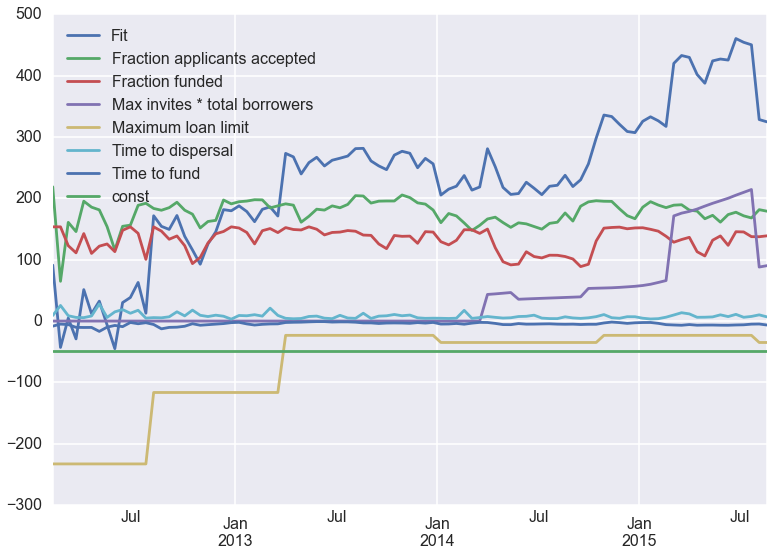

In [110]:
df_fit.plot()

In [49]:
m_corr = results.cov_params()
v_sdev = np.sqrt(np.diag(m_corr))
m_corr /= np.outer(v_sdev, v_sdev)
pd.DataFrame(m_corr)

,0,1,2,3,4,5,6
0,1.000000,0.000501,-0.200590,-0.107893,-0.527075,-0.495929,-0.630880
1,0.000501,1.000000,-0.158460,0.089402,0.133899,-0.341667,0.138653
2,-0.200590,-0.158460,1.000000,-0.855019,0.576021,-0.118859,-0.452449
3,-0.107893,0.089402,-0.855019,1.000000,-0.401182,0.167772,0.692227
4,-0.527075,0.133899,0.576021,-0.401182,1.000000,-0.344641,0.169261
5,-0.495929,-0.341667,-0.118859,0.167772,-0.344641,1.000000,0.139399
6,-0.630880,0.138653,-0.452449,0.692227,0.169261,0.139399,1.000000


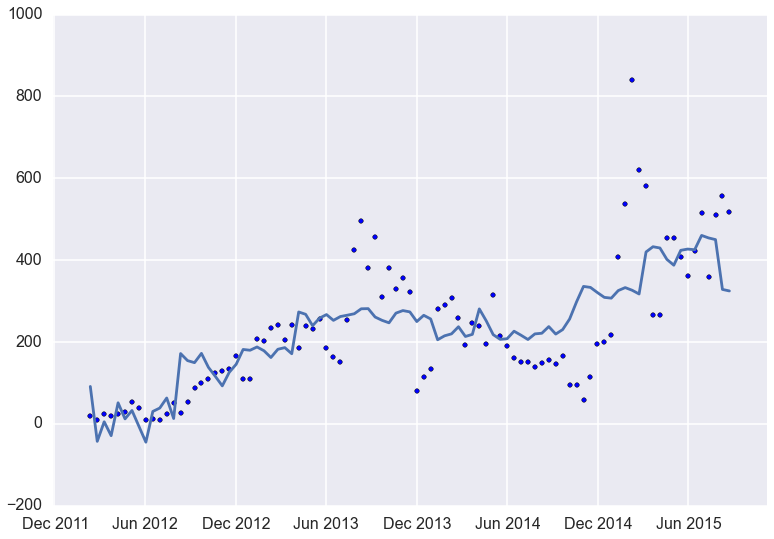

In [111]:
plt.scatter(time_bins_center, label_array)
plt.plot(time_bins_center, fit_array)

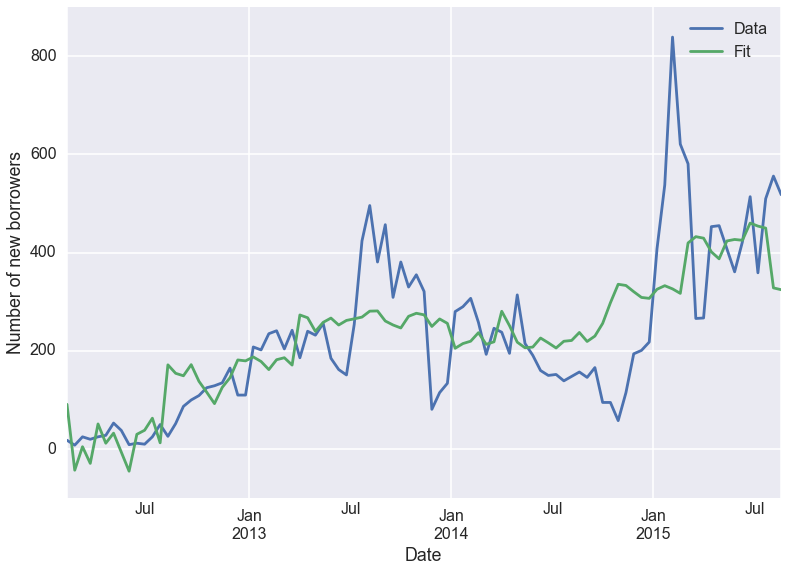

In [112]:
df_fit = pd.DataFrame({'Fit': fit_array, 'Data':df_new_borrowers_counts.new_borrowers_per_period},index=time_bins_center)

df_fit.plot()
plt.ylabel('Number of new borrowers')
plt.xlabel('Date')

/usr/local/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


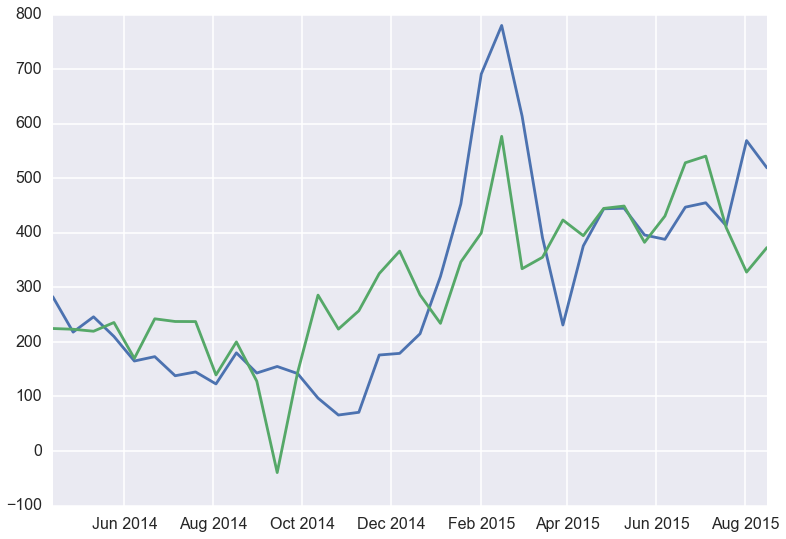

In [52]:
df_fit = pd.DataFrame({'Fit': fit_array},index=time_bins_center)
plt.plot(time_bins_center, label_array)
plt.plot(time_bins_center, fit_array)
plt.legend()

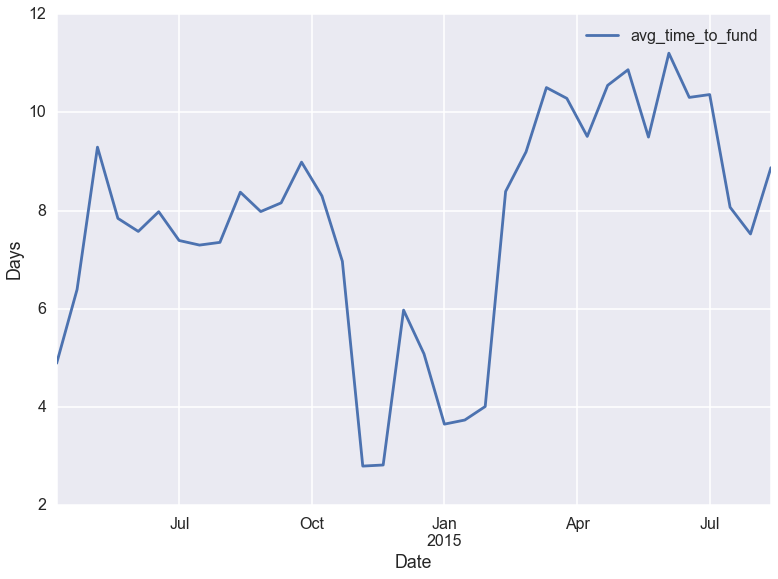

In [53]:
sns.set_context('poster')
#plt.figure(figsize=(8, 6))
df_avg_time_to_fund.plot()
#plt.ylim([0, 11])
plt.ylabel('Days')
plt.xlabel('Date')

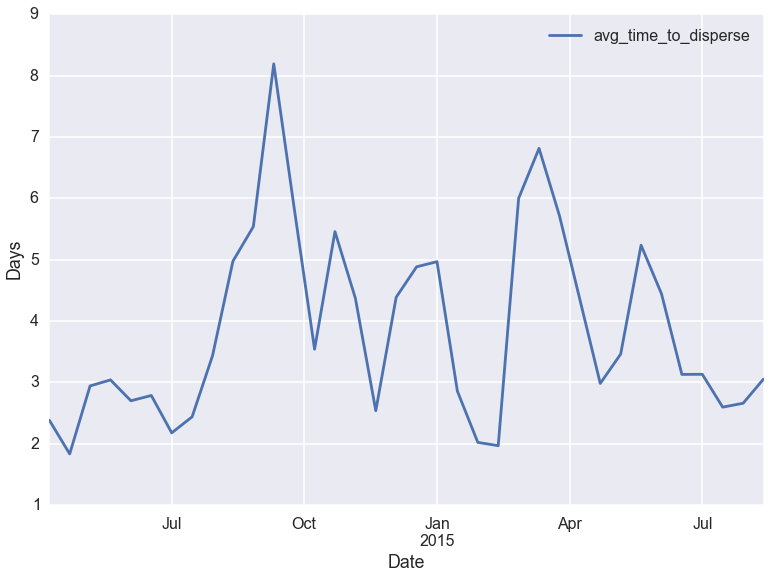

In [54]:
df_avg_time_to_disperse.plot()
plt.ylabel('Days')
plt.xlabel('Date')

In [62]:
df_max_new_loan.max()[0]

150

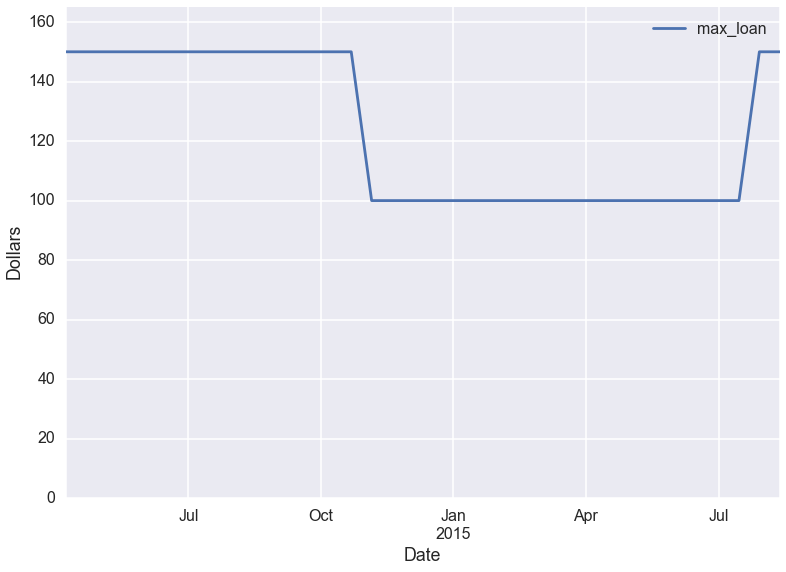

In [64]:
df_max_new_loan.plot()
plt.ylim([0, 1.1*df_max_new_loan.max()[0]])
plt.ylabel('Dollars')
plt.xlabel('Date')

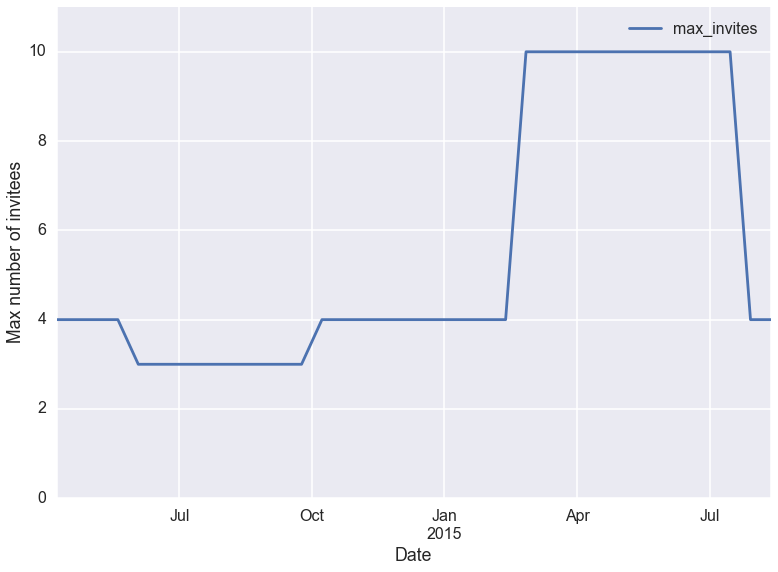

In [56]:
df_max_invite.plot()
plt.ylim([0,11])
plt.ylabel('Max number of invitees')
plt.xlabel('Date')

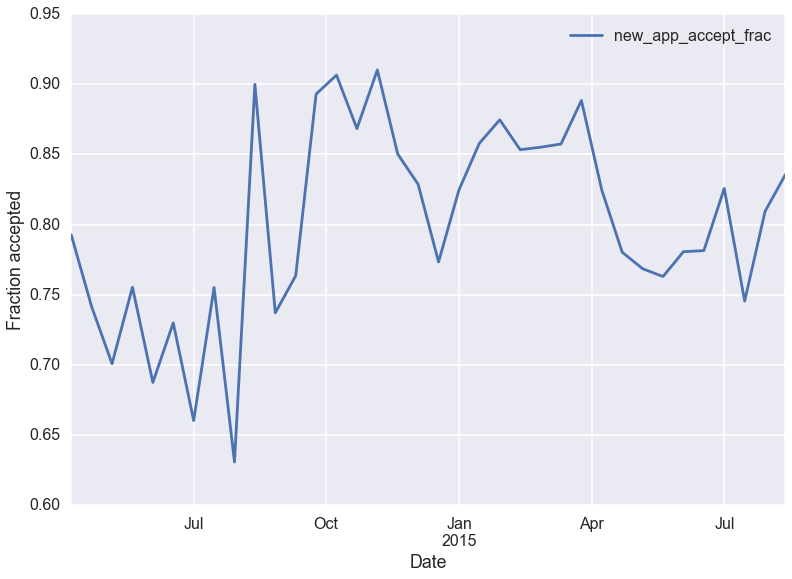

In [57]:
df_new_app_accept_rate.plot()
plt.ylabel('Fraction accepted')
plt.xlabel('Date')

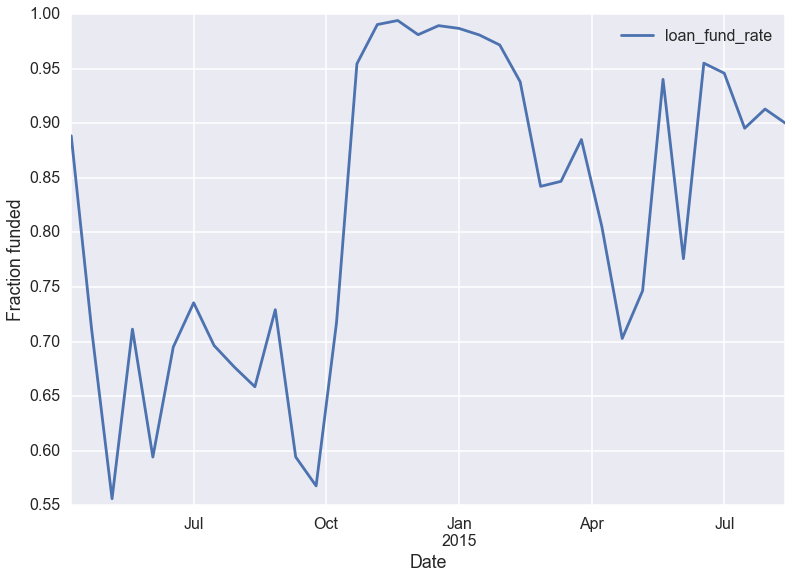

In [58]:
df_loans_fund_rate.plot()
plt.ylabel('Fraction funded')
plt.xlabel('Date')

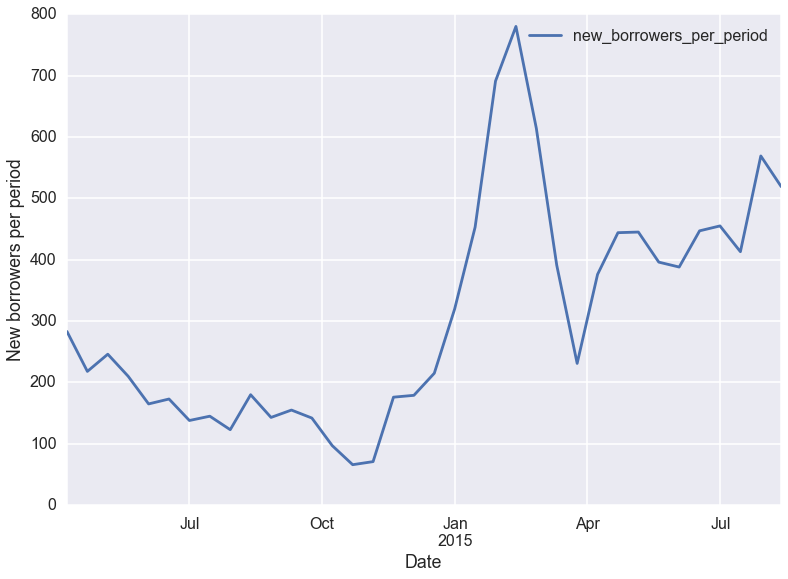

In [59]:
df_new_borrowers_counts.plot()
plt.ylabel('New borrowers per period')
plt.xlabel('Date')

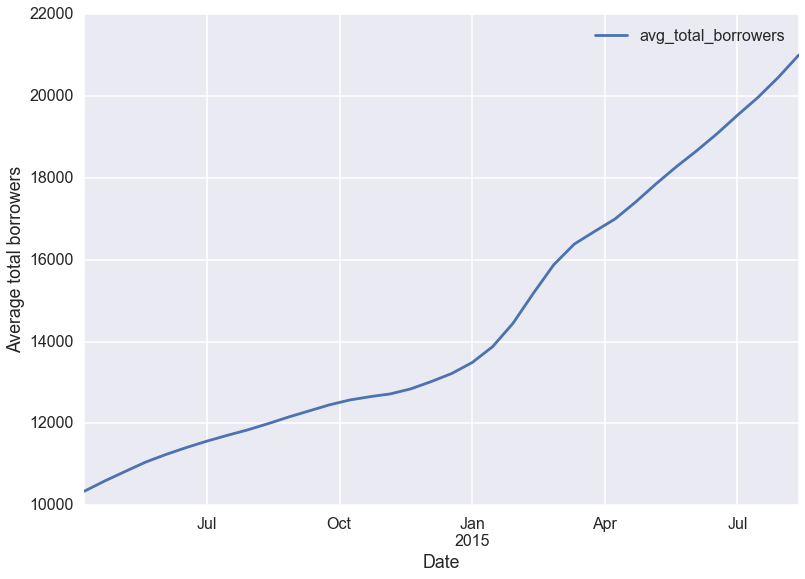

In [60]:
df_avg_total_borrowers.plot()
plt.ylabel('Average total borrowers')
plt.xlabel('Date')

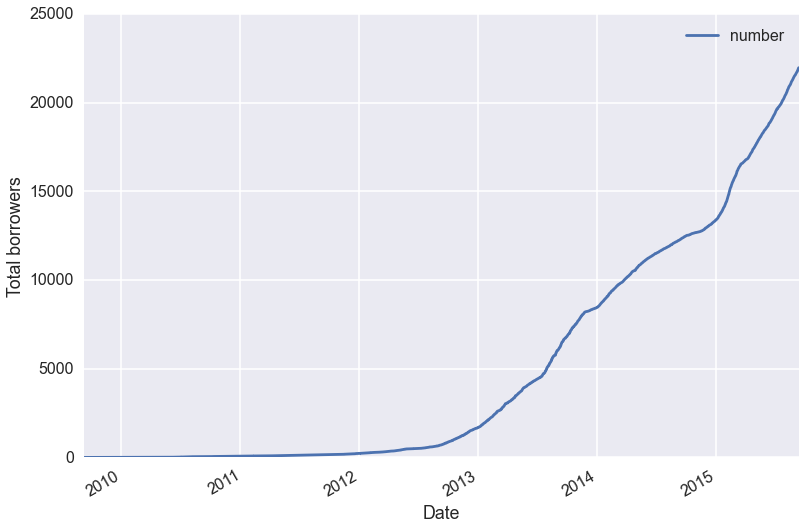

In [35]:
df_new_borrowers.plot()
plt.ylabel('Total borrowers')
plt.xlabel('Date')

In [ ]:
df_borrowers.dtypes

In [ ]:
df_loans.dtypes

In [ ]:
df_exchange.dtypes

In [ ]:
df_countries.dtypes

In [ ]:
df_countries[df_countries.name=='Kenya']

In [ ]:
#merge tables (this is not particularly efficient, as we do not need all the columns)
df_loans_borrowers = pd.merge(df_borrowers, df_loans, left_on='id', right_on='borrower_id')
df_loans_borrowers_countries = pd.merge(df_loans_borrowers, df_countries, left_on='country_id',right_on='id')

In [ ]:
df_borrowers_time = df_borrowers.set_index('created_at')
df_borrowers_time = df_borrowers_time[df_borrowers_time.activation_status != 4]
#s_new_rates = df_borrowers_time.groupby([lambda x: pd.datetime(x.year, x.month, 0, 0)])['id'].count()
s_new_rates = df_borrowers_time.groupby([lambda x: x.year, lambda x: x.month, ])['id'].count()
#s_new_rates = pd.DataFrame({s_new_rates})

In [ ]:
df_borrowers_simp = pd.DataFrame({'year' : df_borrowers.created_at.dt.year,
                                 'month' : df_borrowers.created_at.dt.month,
                                 'id' : df_borrowers.id})
s_new_rates = df_borrowers_simp.groupby(['year','month'])['id'].count()
s_new_rates = pd.DataFrame({'date' : dateTime(s_new_rates})